# Inserting Relevant Libraries

In [12]:
import numpy as np
import pprint as pp
from numpy.linalg import *
import itertools
import matplotlib.pyplot as plt
import pandas as pd

# Taking the inputs and printing the size

In [13]:
a = np.array([[3, 7, 13,76],[1, 5, 3,28],[12, 3, -5,1]])
pp.pprint(a)


array([[ 3,  7, 13, 76],
       [ 1,  5,  3, 28],
       [12,  3, -5,  1]])


In [14]:
n=len(a)
n

3

# The jacobi iteration function

In [15]:
dataa=[]
def jacobi(A, b, x0, tol, maxiter=200):
    
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    k = 0
    rel_diff = tol * 2
    

    while (rel_diff > tol) and (k < maxiter):

        for i in range(0, n):
            subs = 0.0
            for j in range(0, n):
                if i != j:
                    subs += A[i,j] * x_prev[j]

            x[i] = (b[i] - subs ) / A[i,i]
        k += 1

        rel_diff = norm(x - x_prev) / norm(x)
        print(x, rel_diff)
        dataa.append((k,x[0][0]))
        x_prev = x.copy()

    return x, rel_diff, k

# Checking for the diagonally dominant condition

In [16]:
# whether given matrix is  
# Diagonally Dominant Matrix. 
  
# check the given given  
# matrix is Diagonally  
# Dominant Matrix or not. 
def isitDDM(s, n) : 
  
    # for each row 
    for i in range(0, n) :          
      
        # for each column, finding 
        # sum of each row. 
        sum = 0
        for j in range(0, n) : 
            sum += abs(s[i,j])      
  
        # removing the  
        # diagonal element. 
        sum -= abs(s[i,i]) 
  
        # checking if diagonal  
        # element is less than  
        # sum of non-diagonal 
        # element. 
        if (abs(s[i,i]) < sum) : 
            return False
  
    return True

In [17]:
isitDDM(a,n)

False

# Changing it to diagonally dominant form

In [18]:
import random
isdom = isitDDM(a,n)
while 1:
    if isitDDM(a,n):
        print('Matrix a is diagonally dominant')
        break
    else:
        a = np.random.permutation(a)

Matrix a is diagonally dominant


In [19]:
a

array([[12,  3, -5,  1],
       [ 1,  5,  3, 28],
       [ 3,  7, 13, 76]])

# Splitting the matrix into A and b 

In [20]:
x = np.zeros((3,1))
dim=np.shape(a)
[A,b]=np.split(a,[dim[0]],axis=1)
print("A")
print(A)
print("b")
print(b)

A
[[12  3 -5]
 [ 1  5  3]
 [ 3  7 13]]
b
[[ 1]
 [28]
 [76]]


# Main function 

In [21]:
tol = 1E-16
maxiter = 200
x, rel_diff, k = jacobi(A, b, x, tol, maxiter)
if k == maxiter:
    print(('WARNING: the Jacobi iterations did not '
           'converge within the required tolerance.'))
print(('The solution is %s; within a tolerance of %g, '
        'using %d iterations.' % (x, rel_diff, k)))
print('Solution error = norm(Ax-b) = %g' % \
            norm(np.dot(A,x)-b)) 
print('Condition number of A = %0.5f' % cond(a))
print('Solution from built-in functions = %s' % solve(A, b))


[[0.08333333]
 [5.6       ]
 [5.84615385]] 1.0
[[1.11923077]
 [2.07564103]
 [2.81153846]] 1.2984574894290812
[[0.73589744]
 [3.68923077]
 [4.47021696]] 0.4014716431039657
[[1.02361604]
 [2.77069034]
 [3.68982249]] 0.2621754810261305
[[0.92808679]
 [3.1813833 ]
 [4.11802458]] 0.11369106750984626
[[1.00383108]
 [2.9435679 ]
 [3.91892743]] 0.06381529819340635
[[0.98032779]
 [3.04787733]
 [4.02950242]] 0.029887125946335635
[[1.00032334]
 [2.98623299]
 [3.97875964]] 0.016220569456660883
[[0.9945916 ]
 [3.01267955]
 [4.00733839]] 0.007700281911032718
[[0.99988778]
 [2.99667865]
 [3.99442064]] 0.004169818679518677
[[0.99850561]
 [3.00337006]
 [4.00181432]] 0.001973167681839518
[[0.99991345]
 [2.99921029]
 [3.99853021]] 0.0010757889646044062
[[0.99958502]
 [3.00089918]
 [4.0004452 ]] 0.0005047980863359007
[[0.99996071]
 [2.99981588]
 [3.99961159]] 0.00027803823528751493
[[0.99988419]
 [3.0002409 ]
 [4.00010821]] 0.00012906507780803612
[[0.99998486]
 [2.99995823]
 [3.99989701]] 7.19642861901475

# Graph representing iterations vs x[0] solution

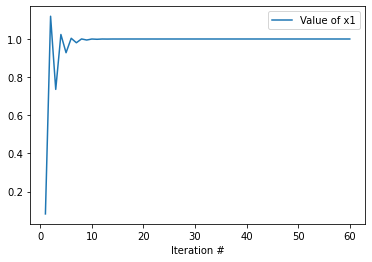

In [22]:
df = pd.DataFrame(dataa,columns=['Iteration #','Value of x1'])
df.plot(x='Iteration #',y='Value of x1',kind='line')
plt.show()
